# **Phishing URL Detection** with Machine Learning

## Objectives

1. Collect URL data from various surveys and websites
2. Create datasets for malicious and benevolent URLs
3. Extract features from the URLs in these datasets
4. Mix and shuffle the datasets into a single dataset
5. Split the mixed dataset into training and testing datasets
6. Create a Neural Network model
7. Use training data to train the model
8. Test the model with the testing data
9. Improve model hyperparameters
10. Repeat steps 6 through 9 with the new model configurations

## Libraries & Packages

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

## Datasets

In [0]:
alexaRank_data = pd.read_csv('/content/top-1m.csv', names=['Rank','Domain'],
                             skipinitialspace=True, skiprows=1, engine="python")
alexaRank_data

,Rank,Domain
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org
...,...,...
999995,999996,sibf.org
999996,999997,bukapintu.co
999997,999998,klatovynet.cz
999998,999999,elconquistadorfm.cl


In [0]:
forbes_data = pd.DataFrame(pd.read_csv('/content/Forbes Global 2000 - 2019.csv').Company)
top_brands = set()
for ele in forbes_data.Company:
  ele = ele.lower().replace(" ", "")
  top_brands.add(ele)

for ele in alexaRank_data.Domain[:500]:
  ele = ele.split('.')[0]
  ele = ele.lower().replace(" ", "")
  top_brands.add(ele)

print('Number of brands taken into account:', len(top_brands))

Number of brands taken into account: 2387


In [0]:
phishtank_data = pd.read_csv('/content/phishtank_data.csv', usecols=['url'])
phishtank_data

,url
0,https://brf-sa-sadia.com/
1,https://pexene.com/Payment/NOTEPURE/uh/No_cap/...
2,https://facebouk.site
3,https://vousaveznouveauxmmsn1.webnode.pt/conta...
4,http://amz-limited.000webhostapp.com/
...,...
14920,http://bancoestado700.blogspot.com/
14921,http://www.habbocreditosparati.blogspot.com/
14922,http://creditiperhabbogratissicuro100.blogspot...
14923,http://mundovirtualhabbo.blogspot.com/2009_01_...


## Functions

In [0]:
def domain(s):
    lst = s.split('/')
    if '' in lst:
        return lst[lst.index('')+1]
    else:
        return lst[0]

In [0]:
def getFeatures(url, isMal = None):
    row = []
    d = domain(url)
    top = 0
    for ele in top_brands:
      if ele in d:
        top = 1
        break
    l = len(d)
    tld = d.split('.')[-1]
    l_tld = len(tld)
    is_ip = 0
    if tld.isnumeric():
        is_ip = 1
    c_tld = 1
    if tld in top20_tld:
        c_tld = 2
    if tld in bottom20_tld:
        c_tld = 0
    dig = 0
    sub_d = 0
    c_at = 0
    for char in d:
        if char >= '0' and char <= '9':
            dig += 1
        elif char == '.':
            sub_d += 1
        elif char == '@':
            c_at = 1
    if isMal==0 or isMal==1:
        row = np.array([[d, tld, l, l_tld, dig, is_ip, sub_d, c_at, c_tld, top, isMal]])
        return pd.DataFrame(row, columns = ['Domain', 'TLD', 'Length', 'len_TLD', 'Digit_count', 'is_IP',
                                            'Subdomain_count', 'contains_@', 'common_TLD', 'Top_Brand_name', 'Malicious'])
    else:
        row = [[d, tld, l, l_tld, dig, is_ip, sub_d, c_at, c_tld, top]]
        return pd.DataFrame(row, columns = ['Domain', 'TLD', 'Length', 'len_TLD', 'Digit_count', 'is_IP',
                                            'Subdomain_count', 'contains_@', 'common_TLD', 'Top_Brand_name'])


## Constants

In [0]:
data = {
    'Domain':[],
    'TLD':[],
    'Length':[],
    'len_TLD':[],
    'Digit_count':[],
    'is_IP':[],
    'Subdomain_count':[],
    'contains_@':[],
    'common_TLD':[],
    'Top_Brand_name':[],
    'Malicious':[]
}

In [0]:
top20_tld = {'com', 'org', 'edu', 'gov', 'uk', 'net', 'ca', 'de', 'jp', 'fr',
             'au', 'us', 'ru', 'ch', 'it', 'nl', 'se', 'no', 'es', 'mil'}

bottom20_tld = {'gw', 'ax', 'wf', 'yt', 'sj', 'mobi', 'eh', 'mh', 'bv', 'ap',
                'cat', 'kp', 'iq', 'um', 'arpa', 'pm', 'gb', 'cs', 'td', 'so'}

feature_col = ['Length', 'len_TLD', 'Digit_count', 'is_IP', 'Subdomain_count',
               'contains_@', 'common_TLD', 'Top_Brand_name']

## Feature Extraction

#### Malicious URLs

In [0]:
dataset = pd.DataFrame(data)
print('Extracting Features from URLs:', end = '')
count = 0
for ele in phishtank_data['url'][:12500]:
    df = getFeatures(ele, 1)
    if count%500 == 0:
      print('>', end = '')
    dataset = dataset.append(df, ignore_index = True)
    count+=1
print()
bad_data = dataset
bad_data[feature_col] = bad_data[feature_col].astype(int)
bad_data['Malicious'] = bad_data['Malicious'].astype(int)
bad_data.info()

Extracting Features from URLs:>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Domain           12500 non-null  object
 1   TLD              12500 non-null  object
 2   Length           12500 non-null  int64 
 3   len_TLD          12500 non-null  int64 
 4   Digit_count      12500 non-null  int64 
 5   is_IP            12500 non-null  int64 
 6   Subdomain_count  12500 non-null  int64 
 7   contains_@       12500 non-null  int64 
 8   common_TLD       12500 non-null  int64 
 9   Top_Brand_name   12500 non-null  int64 
 10  Malicious        12500 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.0+ MB


#### Benevolent URLs

In [0]:
dataset = pd.DataFrame(data)
print('Extracting Features from URLs:', end = '')
count = 0
for ele in alexaRank_data.Domain[:12500]:
    df = getFeatures(ele, 0)
    if count%500 == 0:
      print('>', end = '')
    dataset = dataset.append(df, ignore_index = True)
    count += 1
print()
good_data = dataset
good_data[feature_col] = good_data[feature_col].astype(int)
good_data['Malicious'] = good_data['Malicious'].astype(int)
good_data.info()

Extracting Features from URLs:>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Domain           12500 non-null  object
 1   TLD              12500 non-null  object
 2   Length           12500 non-null  int64 
 3   len_TLD          12500 non-null  int64 
 4   Digit_count      12500 non-null  int64 
 5   is_IP            12500 non-null  int64 
 6   Subdomain_count  12500 non-null  int64 
 7   contains_@       12500 non-null  int64 
 8   common_TLD       12500 non-null  int64 
 9   Top_Brand_name   12500 non-null  int64 
 10  Malicious        12500 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.0+ MB


#### Combining different URLs into single dataset

In [0]:
url_data = bad_data.append(good_data, ignore_index = True)
url_data = url_data.sample(frac=1).reset_index(drop=True)
url_data

,Domain,TLD,Length,len_TLD,Digit_count,is_IP,Subdomain_count,contains_@,common_TLD,Top_Brand_name,Malicious
0,jiayuan.com,com,11,3,0,0,1,0,2,0,0
1,faderfaderfader.com,com,19,3,0,0,1,0,2,0,1
2,www.lrct.go.tz,tz,14,2,0,0,3,0,1,1,1
3,betpergirisadresimiz.blogspot.com,com,33,3,0,0,2,0,2,1,1
4,sc2playback.com,com,15,3,1,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24995,itbgiso.keltron.in,in,18,2,0,0,2,0,1,1,1
24996,karmajewelryshop.com,com,20,3,0,0,1,0,2,0,1
24997,retirafclgocr.com,com,17,3,0,0,1,0,2,1,1
24998,funsafetab.com,com,14,3,0,0,1,0,2,1,0


## Train-Test Split

In [0]:
train, test = train_test_split(url_data, test_size=0.2, random_state=42, shuffle=True)
url_train_data = train.reset_index(drop = True)
url_test_data = test.reset_index(drop = True)
print('Dimensions of Training dataset:', url_train_data.shape)
print('Dimensions of Testing dataset:', url_test_data.shape)

Dimensions of Training dataset: (20000, 11)
Dimensions of Testing dataset: (5000, 11)


In [0]:
train_y = url_train_data.pop('Malicious')
train_X = url_train_data[feature_col]
test_y = url_test_data.pop('Malicious')
test_X = url_test_data[feature_col]

#### Tensor Formation

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((train_X.values, train_y.values))
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))
train_dataset = dataset.shuffle(len(url_train_data)).batch(1)
train_dataset

Features: [12  3  0  0  1  0  2  1], Target: 1
Features: [9 3 0 0 1 0 1 1], Target: 0
Features: [12  3  0  0  1  0  2  1], Target: 0
Features: [8 2 1 0 1 0 1 0], Target: 0
Features: [30  3  0  0  2  0  2  1], Target: 1


<BatchDataset shapes: ((None, 8), (None,)), types: (tf.int64, tf.int64)>

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((test_X.values, test_y.values))
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))
test_dataset = dataset.shuffle(len(url_test_data)).batch(1)
test_dataset

Features: [19  3  0  0  1  0  2  1], Target: 1
Features: [18  3  0  0  1  0  2  1], Target: 1
Features: [10  2  0  0  2  0  1  0], Target: 0
Features: [27  3  0  0  2  0  2  1], Target: 1
Features: [15  3  0  0  1  0  2  1], Target: 0


<BatchDataset shapes: ((None, 8), (None,)), types: (tf.int64, tf.int64)>

## Model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(len(feature_col), activation='relu'),
                             tf.keras.layers.Dense(2*len(feature_col), activation='relu'),
                             tf.keras.layers.Dense(1, activation='hard_sigmoid')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training Model

In [0]:
hist = model.fit(train_dataset, epochs = 10)

Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6152 - accuracy: 0.7355
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6075 - accuracy: 0.7498
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6023 - accuracy: 0.7626
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.5983 - accuracy: 0.7724
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5962 - accuracy: 0.7770
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.5950 - accuracy: 0.7797
Epoch 7/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5945 - accuracy: 0.7792
Epoch 8/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5942 - accuracy: 0.7778
Epoch 9/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.5939 - accuracy: 0.7825
Epoch 10/10
20000/20000 [==============================

#### Metric Visualization

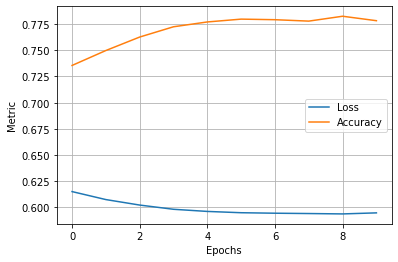

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.grid(b = True)
plt.legend(['Loss', 'Accuracy'], loc = 'center right')
plt.show()

#### Testing Model

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)
print('\nTest Accuracy =', "{:.2f}".format(test_acc*100), '%')

5000/5000 [==============================] - 4s 899us/step - loss: 0.5917 - accuracy: 0.7890

Test Accuracy = 78.90 %


#### Model prediction on sample data

In [0]:
url = 'https://colab.research.google.com/drive/10mCw025h30niD1xrBIGxgNz5lDxvH_--#scrollTo=OwWFD4_i1a-o'
df = getFeatures(url)
df = df[feature_col]
data = tf.data.Dataset.from_tensor_slices((train_X.values)).batch(1)
pred = model.predict(data)
print(pred[0])

[0.]
